In [1]:
#import Func_Lib as func
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
plt.style.use('seaborn-white')
import time
import os
from glob import glob
import sys
import seaborn as sns
from decimal import Decimal

In [2]:
RCP=pd.read_csv('RCP_shasta_decade.csv')
RCP.index=pd.to_datetime(RCP['Date'])
RCP['RCP8.5_step']=round(RCP['RCP8.5_rolling'])
RCP['RCP4.5_step']=round(RCP['RCP4.5_rolling'])
RCP

,Date,RCP8.5,RCP4.5,RCP4.5_rolling,RCP8.5_rolling,decade,RCP8.5_step,RCP4.5_step
Date,,,,,,,,
2010-12-31,2010-12-31,-0.014220,2.262087,0.788543,0.539294,2010,1.0,1.0
2020-12-31,2020-12-31,0.400301,1.164405,0.940177,0.456522,2020,0.0,1.0
2030-12-31,2030-12-31,1.728647,0.943950,1.147019,1.143952,2030,1.0,1.0
2040-12-31,2040-12-31,0.811085,1.043632,0.957327,1.256308,2040,1.0,1.0
2050-12-31,2050-12-31,1.786668,0.627413,0.770231,1.242602,2050,1.0,1.0
2060-12-31,2060-12-31,2.304911,1.232035,0.986437,1.992169,2060,2.0,1.0
2070-12-31,2070-12-31,2.323574,1.720625,1.511216,2.281160,2070,2.0,2.0
2080-12-31,2080-12-31,2.714370,2.033220,1.856094,2.670992,2080,3.0,2.0
2090-12-31,2090-12-31,3.257213,1.303116,1.601769,3.136338,2090,3.0,2.0


## <font color = 'green'> Reloading in the data </font>

In [3]:
flood50Y0 = np.load('flood50Y0.npy')
flood100Y0 = np.load('flood100Y0.npy')
flood500Y0 = np.load('flood500Y0.npy')

flood50Y1 = np.load('flood50Y1.npy')
flood100Y1 = np.load('flood100Y1.npy')
flood500Y1 = np.load('flood500Y1.npy')

flood50Y2 = np.load('flood50Y2.npy')
flood100Y2 = np.load('flood100Y2.npy')
flood500Y2 = np.load('flood500Y2.npy')

flood50Y3 = np.load('flood50Y3.npy')
flood100Y3 = np.load('flood100Y3.npy')
flood500Y3 = np.load('flood500Y3.npy')

flood50Y4 = np.load('flood50Y4.npy')
flood100Y4 = np.load('flood100Y4.npy')
flood500Y4 = np.load('flood500Y4.npy')

flood50Y5 = np.load('flood50Y5.npy')
flood100Y5 = np.load('flood100Y5.npy')
flood500Y5 = np.load('flood500Y5.npy')

## <font color = 'green'> Generating Figures </font>

In [4]:
n=np.int(RCP['RCP4.5_step'].loc['2030-12-31'])
print(n)
n=np.int(RCP['RCP4.5_step'].loc['2050-12-31'])
print(n)
n=np.int(RCP['RCP4.5_step'].loc['2070-12-31'])
print(n)
n=np.int(RCP['RCP4.5_step'].loc['2100-12-31'])
print(n)

1
1
2
1


In [5]:
n=np.int(RCP['RCP8.5_step'].loc['2030-12-31'])
print(n)
n=np.int(RCP['RCP8.5_step'].loc['2050-12-31'])
print(n)
n=np.int(RCP['RCP8.5_step'].loc['2070-12-31'])
print(n)
n=np.int(RCP['RCP8.5_step'].loc['2100-12-31'])
print(n)

1
1
2
3


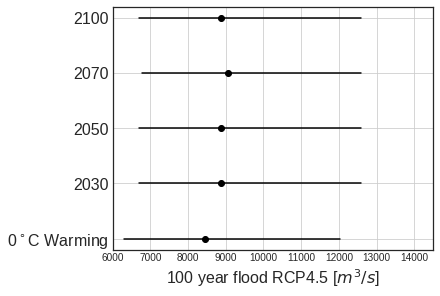

In [6]:
minQ100_100=np.percentile(flood100Y1,5)
maxQ100_100=np.percentile(flood100Y1,95)

minQ100_70=np.percentile(flood100Y2,5)
maxQ100_70=np.percentile(flood100Y2,95)

minQ100_50=np.percentile(flood100Y1,5)
maxQ100_50=np.percentile(flood100Y1,95)

minQ100_30=np.percentile(flood100Y1,5)
maxQ100_30=np.percentile(flood100Y1,95)

minQ100_0=np.percentile(flood100Y0,5)
maxQ100_0=np.percentile(flood100Y0,95)

plt.figure(figsize=(6,4), constrained_layout=True)

plt.plot([minQ100_100,maxQ100_100],[5,5],color='k')
plt.scatter(np.median(flood100Y1), 5,color='k')
plt.plot([minQ100_70,maxQ100_70],[4,4],color='k')
plt.scatter(np.median(flood100Y2), 4,color='k')
plt.plot([minQ100_50,maxQ100_50],[3,3],color='k')
plt.scatter(np.median(flood100Y1), 3,color='k')
plt.plot([minQ100_30,maxQ100_30],[2,2],color='k')
plt.scatter(np.median(flood100Y1), 2,color='k')

#plt.scatter(3525.45,1,color='k')
#plt.plot([2622,5142],[1,1],color='k')

plt.plot([minQ100_0,maxQ100_0],[1,1],color='k')
plt.scatter(np.median(flood100Y0), 1,color='k')

#plt.xticks([2000,4000,6000,8000,10000,12000])

plt.grid()

plt.xlabel('100 year flood RCP4.5 [$m^3/s$]',size=16)
plt.yticks([1,2,3,4,5],['0$^\circ$C Warming','2030','2050','2070', '2100'],size=16)

plt.xlim(6000,14500)
plt.savefig('100_flood_45_final.png', dpi=1000)

plt.show() #display plot

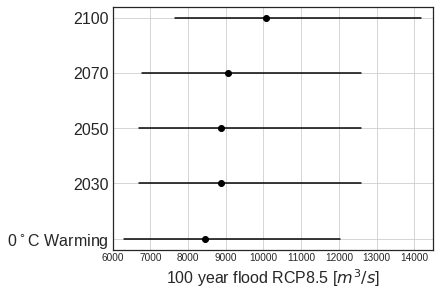

In [7]:
minQ100_100=np.percentile(flood100Y3,5)
maxQ100_100=np.percentile(flood100Y3,95)

minQ100_70=np.percentile(flood100Y2,5)
maxQ100_70=np.percentile(flood100Y2,95)

minQ100_50=np.percentile(flood100Y1,5)
maxQ100_50=np.percentile(flood100Y1,95)

minQ100_30=np.percentile(flood100Y1,5)
maxQ100_30=np.percentile(flood100Y1,95)

minQ100_0=np.percentile(flood100Y0,5)
maxQ100_0=np.percentile(flood100Y0,95)

plt.figure(figsize=(6,4), constrained_layout=True)

plt.plot([minQ100_100,maxQ100_100],[5,5],color='k')
plt.scatter(np.median(flood100Y3), 5,color='k')
plt.plot([minQ100_70,maxQ100_70],[4,4],color='k')
plt.scatter(np.median(flood100Y2), 4,color='k')
plt.plot([minQ100_50,maxQ100_50],[3,3],color='k')
plt.scatter(np.median(flood100Y1), 3,color='k')
plt.plot([minQ100_30,maxQ100_30],[2,2],color='k')
plt.scatter(np.median(flood100Y1), 2,color='k')

#plt.scatter(3525.45,1,color='k')
#plt.plot([2622,5142],[1,1],color='k')

plt.plot([minQ100_0,maxQ100_0],[1,1],color='k')
plt.scatter(np.median(flood100Y0), 1,color='k')

#plt.xticks([2000,4000,6000,8000,10000,12000])

plt.grid()
#plt.xlim(2000,12000)
plt.xlabel('100 year flood RCP8.5 [$m^3/s$]',size=16)
plt.yticks([1,2,3,4,5],['0$^\circ$C Warming','2030','2050','2070', '2100'],size=16)

plt.xlim(6000,14500)
plt.savefig('100_flood_85_final.png', dpi=1000)

plt.show() #display plot

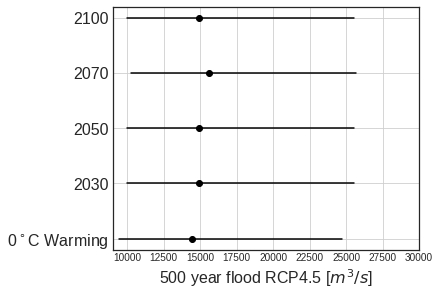

In [8]:
minQ100_100=np.percentile(flood500Y1,5)
maxQ100_100=np.percentile(flood500Y1,95)

minQ100_70=np.percentile(flood500Y2,5)
maxQ100_70=np.percentile(flood500Y2,95)

minQ100_50=np.percentile(flood500Y1,5)
maxQ100_50=np.percentile(flood500Y1,95)

minQ100_30=np.percentile(flood500Y1,5)
maxQ100_30=np.percentile(flood500Y1,95)

minQ100_0=np.percentile(flood500Y0,5)
maxQ100_0=np.percentile(flood500Y0,95)

plt.figure(figsize=(6,4), constrained_layout=True)

plt.plot([minQ100_100,maxQ100_100],[5,5],color='k')
plt.scatter(np.median(flood500Y1), 5,color='k')
plt.plot([minQ100_70,maxQ100_70],[4,4],color='k')
plt.scatter(np.median(flood500Y2), 4,color='k')
plt.plot([minQ100_50,maxQ100_50],[3,3],color='k')
plt.scatter(np.median(flood500Y1), 3,color='k')
plt.plot([minQ100_30,maxQ100_30],[2,2],color='k')
plt.scatter(np.median(flood500Y1), 2,color='k')

#plt.scatter(3525.45,1,color='k')
#plt.plot([2622,5142],[1,1],color='k')

plt.plot([minQ100_0,maxQ100_0],[1,1],color='k')
plt.scatter(np.median(flood500Y0), 1,color='k')

#plt.xticks([2000,4000,6000,8000,10000,12000])

plt.grid()
plt.xlim(9000,30000)
plt.xlabel('500 year flood RCP4.5 [$m^3/s$]',size=16)
plt.yticks([1,2,3,4,5],['0$^\circ$C Warming','2030','2050','2070', '2100'],size=16)
plt.savefig('500_flood_45_final.png', dpi=1000)

plt.show() #display plot

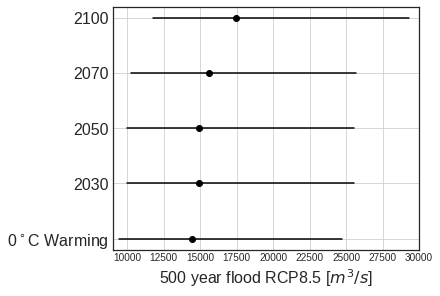

In [9]:
minQ100_100=np.percentile(flood500Y3,5)
maxQ100_100=np.percentile(flood500Y3,95)

minQ100_70=np.percentile(flood500Y2,5)
maxQ100_70=np.percentile(flood500Y2,95)

minQ100_50=np.percentile(flood500Y1,5)
maxQ100_50=np.percentile(flood500Y1,95)

minQ100_30=np.percentile(flood500Y1,5)
maxQ100_30=np.percentile(flood500Y1,95)

minQ100_0=np.percentile(flood500Y0,5)
maxQ100_0=np.percentile(flood500Y0,95)

plt.figure(figsize=(6,4), constrained_layout=True)

plt.plot([minQ100_100,maxQ100_100],[5,5],color='k')
plt.scatter(np.median(flood500Y3), 5,color='k')
plt.plot([minQ100_70,maxQ100_70],[4,4],color='k')
plt.scatter(np.median(flood500Y2), 4,color='k')
plt.plot([minQ100_50,maxQ100_50],[3,3],color='k')
plt.scatter(np.median(flood500Y1), 3,color='k')
plt.plot([minQ100_30,maxQ100_30],[2,2],color='k')
plt.scatter(np.median(flood500Y1), 2,color='k')

#plt.scatter(3525.45,1,color='k')
#plt.plot([2622,5142],[1,1],color='k')

plt.plot([minQ100_0,maxQ100_0],[1,1],color='k')
plt.scatter(np.median(flood500Y0), 1,color='k')

#plt.xticks([2000,4000,6000,8000,10000,12000])

plt.grid()
plt.xlim(9000,30000)
plt.xlabel('500 year flood RCP8.5 [$m^3/s$]',size=16)
plt.yticks([1,2,3,4,5],['0$^\circ$C Warming','2030','2050','2070', '2100'],size=16)
plt.savefig('500_flood_85_final.png', dpi=1000)

plt.show() #display plot

In [10]:
Q_baseline = np.load('Q_baseline.npy')
Q_1degree = np.load('Q_1degree.npy')
Q_2degree = np.load('Q_2degree.npy')
Q_3degree = np.load('Q_3degree.npy')
Q_4degree = np.load('Q_4degree.npy')
Q_5degree = np.load('Q_5degree.npy')

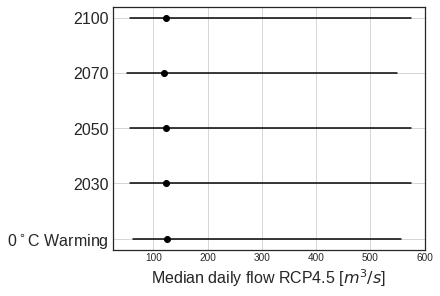

In [11]:
minQ_100=np.percentile(Q_1degree,5)
maxQ_100=np.percentile(Q_1degree,95)

minQ_70=np.percentile(Q_2degree,5)
maxQ_70=np.percentile(Q_2degree,95)

minQ_50=np.percentile(Q_1degree,5)
maxQ_50=np.percentile(Q_1degree,95)

minQ_30=np.percentile(Q_1degree,5)
maxQ_30=np.percentile(Q_1degree,95)

minQ_0=np.percentile(Q_baseline,5)
maxQ_0=np.percentile(Q_baseline,95)

plt.figure(figsize=(6,4), constrained_layout=True)

plt.plot([minQ_100,maxQ_100],[5,5],color='k')
plt.scatter(np.median(Q_1degree), 5,color='k')
plt.plot([minQ_70,maxQ_70],[4,4],color='k')
plt.scatter(np.median(Q_2degree), 4,color='k')
plt.plot([minQ_50,maxQ_50],[3,3],color='k')
plt.scatter(np.median(Q_1degree), 3,color='k')
plt.plot([minQ_30,maxQ_30],[2,2],color='k')
plt.scatter(np.median(Q_1degree), 2,color='k')

#plt.scatter(5577.48,1,color='k')

#plt.plot([3128,11858],[1,1],color='k')

plt.plot([minQ_0,maxQ_0],[1,1],color='k')
plt.scatter(np.median(Q_baseline), 1,color='k')


plt.grid()
#plt.xticks([40,50,60,70,80],size=16)
plt.xlim(25,600)
plt.xlabel('Median daily flow RCP4.5 [$m^3/s$]',size=16)
plt.yticks([1,2,3,4,5],['0$^\circ$C Warming','2030','2050','2070', '2100'],size=16)
plt.savefig('median_45_final.png', dpi=1000)

plt.show()
#plt.savefig('/cluster/tufts/lamontagnelab/gshabe01/500flood2070s.svg',bbox_inches='tight')

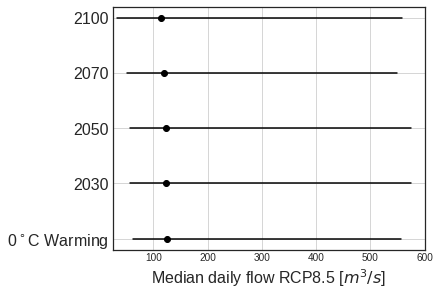

In [12]:
minQ_100=np.percentile(Q_3degree,5)
maxQ_100=np.percentile(Q_3degree,95)

minQ_70=np.percentile(Q_2degree,5)
maxQ_70=np.percentile(Q_2degree,95)

minQ_50=np.percentile(Q_1degree,5)
maxQ_50=np.percentile(Q_1degree,95)

minQ_30=np.percentile(Q_1degree,5)
maxQ_30=np.percentile(Q_1degree,95)

minQ_0=np.percentile(Q_baseline,5)
maxQ_0=np.percentile(Q_baseline,95)

plt.figure(figsize=(6,4), constrained_layout=True)

plt.plot([minQ_100,maxQ_100],[5,5],color='k')
plt.scatter(np.median(Q_3degree), 5,color='k')
plt.plot([minQ_70,maxQ_70],[4,4],color='k')
plt.scatter(np.median(Q_2degree), 4,color='k')
plt.plot([minQ_50,maxQ_50],[3,3],color='k')
plt.scatter(np.median(Q_1degree), 3,color='k')
plt.plot([minQ_30,maxQ_30],[2,2],color='k')
plt.scatter(np.median(Q_1degree), 2,color='k')

#plt.scatter(5577.48,1,color='k')

#plt.plot([3128,11858],[1,1],color='k')

plt.plot([minQ_0,maxQ_0],[1,1],color='k')
plt.scatter(np.median(Q_baseline), 1,color='k')


plt.grid()
#plt.xticks([40,50,60,70,80],size=16)
plt.xlim(25,600)
plt.xlabel('Median daily flow RCP8.5 [$m^3/s$]',size=16)
plt.yticks([1,2,3,4,5],['0$^\circ$C Warming','2030','2050','2070', '2100'],size=16)
#plt.savefig('/cluster/tufts/lamontagnelab/gshabe01/medianflow_RCP45.png',bbox_inches='tight',dpi=500)
plt.savefig('median_85_final.png', dpi=1000)
plt.show()
#plt.savefig('/cluster/tufts/lamontagnelab/gshabe01/500flood2070s.svg',bbox_inches='tight')